# Some imports and helper code

In [2]:
import pickle
import seaborn
import numpy as np
import pandas as pd
import scipy as sci
import networkx as nx
import matplotlib.pylab as plt
np.random.seed(1)

%matplotlib inline 
%load_ext autoreload

plt.style.use('seaborn-paper')
seaborn.set_context('paper', font_scale=2.2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.weight'] = 'medium'

In [113]:
def plot_results(results, alphas):
    plt.figure()
    results[['lambda', 'lambda_sub', 'centrality']].plot(kind='line')
    plt.xlabel('iterations')
    title_template = r'$\alpha_1={:.2f}, \alpha_2={:.2f}, \alpha_3={:.2f}$'
    plt.title(title_template.format(*alphas))
    
    
def plot_adj_matrices(A, attacked_A):
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(A, cmap='hot')
    axes[0].set_title('before attack')
    axes[1].imshow(attacked_A, cmap='hot')
    axes[1].set_title('after attack')

In [193]:
graph_type = 'Email'
Alpha_id = 3

Alpha_to_string = {
    1: '30-10-60',
    2: '40-10-50',
    3: '45-10-45'
}

with open('../result/{}_{}_numExp_30.p'.format(graph_type, "upper-quantile"), 'rb') as fid:
    data = pickle.load(fid)
# data_f = pd.DataFrame(data, columns=['lambda1_S', 'centrality', 'utility', 'budget'], dtype=np.float32)
data_f = pd.DataFrame(data, columns=['lambda1_S', 'centrality', 'utility', 'S_size', \
                                     'Avg. Degree', 'G_size', 'is_detected', 'budget'], dtype=np.float32)
# data_f['u/a'] = data_f['utility'] / data_f['budget']

In [181]:
data_f.groupby('budget')['is_detected'].mean()

budget
0.01    0.0
0.05    0.0
0.10    1.0
0.15    1.0
0.20    1.0
Name: is_detected, dtype: float32

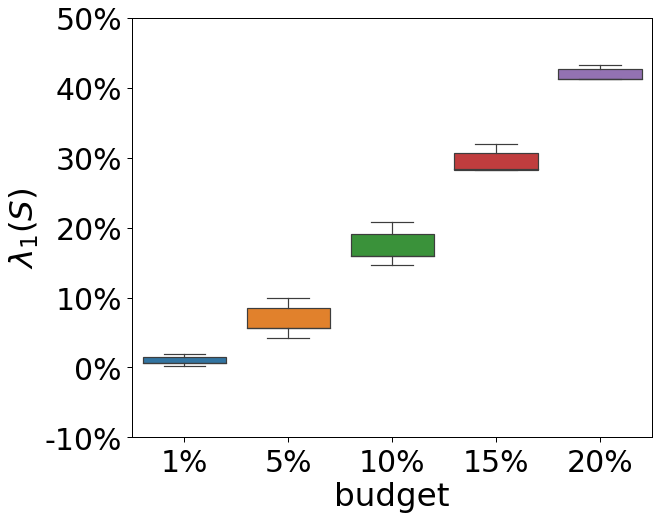

In [194]:
seaborn.set_context('paper', font_scale=3.4)
plt.subplots(figsize=(10, 8))
ax = seaborn.boxplot(x='budget', y='lambda1_S', data=data_f, orient='v', showfliers=False)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\lambda_1(S)$')
plt.xlabel('budget')
plt.tight_layout()
# plt.title("% of increases $\lambda_1(S)$ - {}".format(graph_type))
# plt.savefig('../result/figure/{}_lambda1S_{}_numExp_100.pdf'.format(graph_type, Alpha_to_string[Alpha_id]))

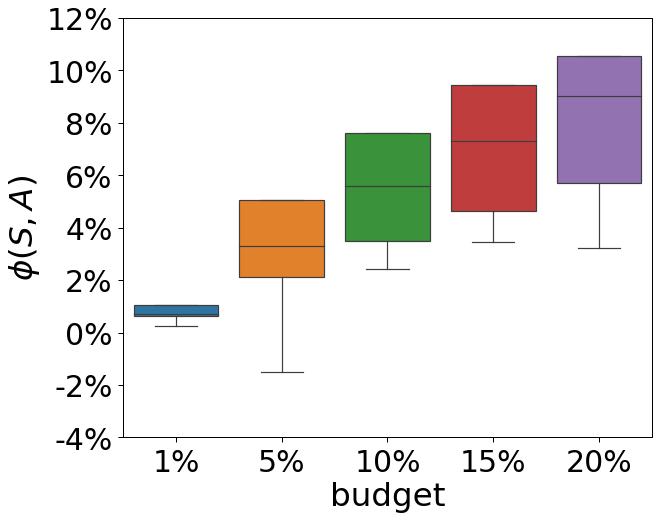

In [195]:
seaborn.set_context('paper', font_scale=3.4)
plt.subplots(figsize=(10, 8))
ax = seaborn.boxplot(x='budget', y='centrality', data=data_f, orient='v', showfliers=False)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\phi(S, A)$')
plt.tight_layout()
# plt.title("% of increases cut(S) - {}".format(graph_type))
# plt.savefig('../result/figure/{}_cut_{}_numExp_100.pdf'.format(graph_type, Alpha_to_string[Alpha_id]))

In [184]:
print(sci.stats.pearsonr(data_f['lambda1_S'], data_f['S_size']))
print(sci.stats.pearsonr(data_f['centrality'], data_f['S_size']))

(0.017537629549971546, 0.9037841591637726)
(0.2709039102091987, 0.057056043556596645)


In [166]:
print(sci.stats.pearsonr(data_f['lambda1_S'], data_f['Avg. Degree']))
print(sci.stats.pearsonr(data_f['centrality'], data_f['Avg. Degree']))

(-0.1478792088009286, 0.0009110175623613336)
(0.4840695289863468, 9.833708530089405e-31)


In [158]:
data_f.groupby('budget')['utility'].mean() / data_f.groupby('budget')['budget'].mean()

budget
0.01    35.578140
0.05     7.796812
0.10     4.348069
0.15     3.212351
0.20     2.583683
dtype: float32

In [159]:
data_f.groupby('budget')['utility'].mean()

budget
0.01    0.355781
0.05    0.389841
0.10    0.434807
0.15    0.481853
0.20    0.516737
Name: utility, dtype: float32

In [167]:
data_f['S_size'].mean() / data_f['G_size'].mean() * 100

8.658666908740997

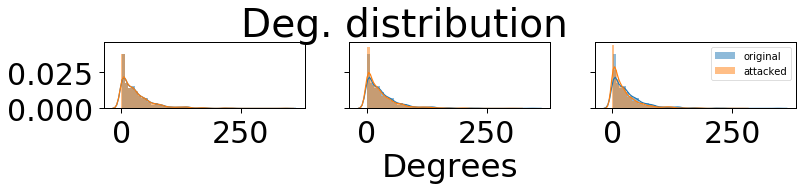

In [185]:
budget_to_string = {
    0.01: '1%',
    0.05: '5%',
    0.1:  '10%',
    0.15: '15%',
    0.2:  '20%'
}


graph_type = 'Email'

with open('../result/{}_{}_numExp_10_Deg_distribution.p'.format(graph_type, "upper-quantile"), 'rb') as fid:
    data = pickle.load(fid)
    

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
f.suptitle('Deg. distribution')
budget = 0.01
data_degs = data[budget]
# pVal = sci.stats.ttest_ind(data_degs['original'], data_degs['attacked'])[1]
seaborn.distplot(data_degs['original'], label='original', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax1)
seaborn.distplot(data_degs['attacked'], label='attacked', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax1)
ax1.set_xlabel(' ')
plt.tight_layout()


budget = 0.1
data_degs = data[budget]
# pVal = sci.stats.ttest_ind(data_degs['original'], data_degs['attacked'])[1]
seaborn.distplot(data_degs['original'], label='original', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax2)
seaborn.distplot(data_degs['attacked'], label='attacked', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax2)
ax2.set_xlabel('Degrees')
plt.tight_layout()


budget = 0.2
data_degs = data[budget]
# pVal = sci.stats.ttest_ind(data_degs['original'], data_degs['attacked'])[1]
seaborn.distplot(data_degs['original'], label='original', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax3)
seaborn.distplot(data_degs['attacked'], label='attacked', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax3)
ax3.set_xlabel(' ')
plt.tight_layout()
plt.legend(['original', 'attacked'], fontsize=10)

# plt.savefig('../result/figure/Deg_dist_{}_{}.pdf'.format(graph_type, Alpha_to_string[Alpha_id]))

# print("Max % for Laplacian spectrum: {:.4f}%".format(100 * np.max(np.abs(data_eig['original'].iloc[1 :] - data_eig['attacked'].iloc[1:]) / np.abs(data_eig['original'].iloc[1:]))))
# print("T-test for degree distribution: ", pVal)

# # plot_adj_matrices(A, attacked_A)

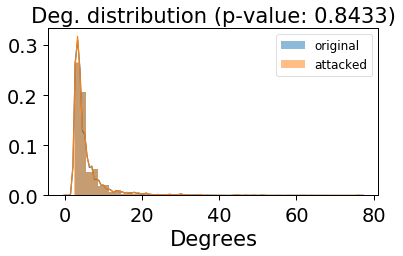

In [226]:
plt.figure()
seaborn.distplot(Deg_dist['original'], label='original', hist_kws={'alpha': 0.5})
seaborn.distplot(Deg_dist['attacked'], label='attacked', hist_kws={'alpha': 0.5})
plt.xlabel('Degrees')
plt.title('Deg. distribution (p-value: {:.4f})'.format(pVal))
plt.tight_layout()
plt.legend(['original', 'attacked'], fontsize=12)

In [41]:
G = nx.read_edgelist('../data/facebook_combined.txt', nodetype=int)
Degs = dict(G.degree())
maxDeg = max(list(Degs.values()))
avgDeg = np.mean(list(Degs.values()))
cc_target = 0.95
gcc = nx.average_clustering(G)